# README

To run the code : 
- Use Python 3.10.9
- Install the requirements.txt
- Execute the code

# Here quick ideas for data analysis

In [1]:
import pandas as pd
from Scrape_huffnpuffer import *

In [32]:
data = pd.read_csv("product_huff_puffer.csv",sep=';')
data.head()

,product,options,average_score,recommand,specifications,package_content,ingredients,nb_review,scores_distribution,caracteristics_scores,reviews
0,candy-king-air-disposable-vape,"[{'option': 'BlueRazz Straws', 'price': 14.99}...",4.4,87.0,"['11.0 mL per e-cigarette', '5% nicotine by we...",['1 X\xa0Candy King Air Disposable E-Cigarette'],"['• USP Grade Propylene Glycol (60%)', '• USP ...",128,"{5: 84, 4: 27, 3: 9, 2: 5, 1: 3}","{'flavor': 86.28048780487805, 'sweetness': 78....","['Worked great', 'Great taste', 'I liked this ..."
1,daze-egge-disposable-vape,"[{'option': '7obacco', 'price': 11.99}, {'opti...",4.7,90.0,"['7.0 mL per e-cigarette', '5% nicotine by wei...",['1 X\xa0Daze Egge Disposable E-Cigarette'],"['• Propylene Glycol (PG)', '• Vegetable Glyce...",174,"{5: 136, 4: 21, 3: 14, 2: 3, 1: 0}","{'flavor': 87.20930232558139, 'sweetness': 74....",['This flavor tastes wonderful! Like a vanilla...
2,daze-ohmlet-disposable-vape,"[{'option': 'Blueberry Cake', 'price': 15.99},...",4.6,89.0,"['15.0 mL per e-cigarette', '5% nicotine by we...",['1 X\xa0Daze Ohmlet Disposable\xa0E-Cig'],"['• Propylene Glycol (PG)', '• Vegetable Glyce...",244,"{5: 186, 4: 30, 3: 17, 2: 6, 1: 5}","{'flavor': 88.72832369942196, 'sweetness': 78....",['This is my go to disposable. Reason being th...
3,elfbar-airo-max-disposable-vape,"[{'option': 'Banana Pineapple', 'price': 14.99...",4.7,93.0,"['13.0 mL of e-liquid per e-cigarette', 'Appro...",['1 X\xa0Elf Bar Airo Max Disposable E-Cigaret...,"['• Vegetable Glycerin (VG)', '• Propylene Gly...",85,"{5: 65, 4: 14, 3: 4, 2: 1, 1: 1}","{'flavor': 89.99999999999999, 'sweetness': 82....",['Good taste. Last long time. Have only tried ...
4,elf-bar-bc5000-disposable-vape,"[{'option': 'Beach Day', 'price': 14.99}, {'op...",4.9,97.0,"['13.0 mL per e-cigarette', '5% nicotine by we...",['1 X\xa0Elf Bar BC5000 Disposable E-Cig'],"['• Vegetable Glycerin (VG)', '• Propylene Gly...",939,"{5: 841, 4: 71, 3: 17, 2: 5, 1: 5}","{'flavor': 94.39252336448598, 'sweetness': 84....","['It was tasty.', 'I like it', 'Best flavor', ..."


In [33]:
data.loc[:, data.columns != 'product'] = str_to_structured(data.drop(['product'],axis=1))

We can see the word "flavor" being extremely used in the reviews. It seem's to be the most important caracteristics as we will see

In [34]:
data['most_commun_words'] = data[data['nb_review']>0]["reviews"].apply(lambda x : most_commun_words(x,5))

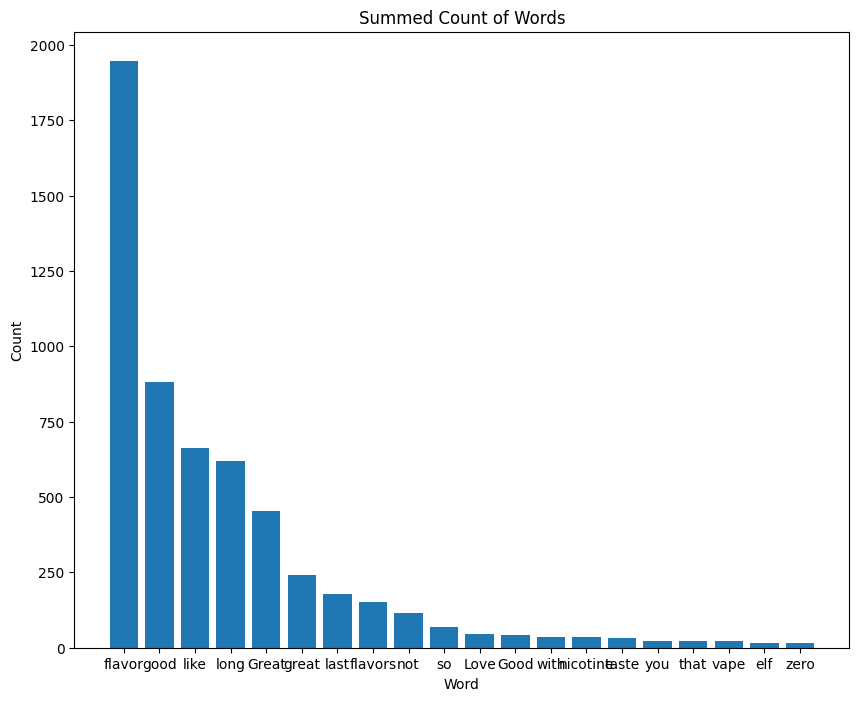

In [35]:
show_most_commun_words(data[data['nb_review']>0]['most_commun_words'])

Looking at the best caracteristic score we see that flavor come hugely in front of the others. It seems people are mostly interested in the flavor and that's what huff and puffer seems to target. 

In [36]:
data['best_caracteristic'] = data[data['nb_review']>0]["caracteristics_scores"].apply(best_caracteristic)

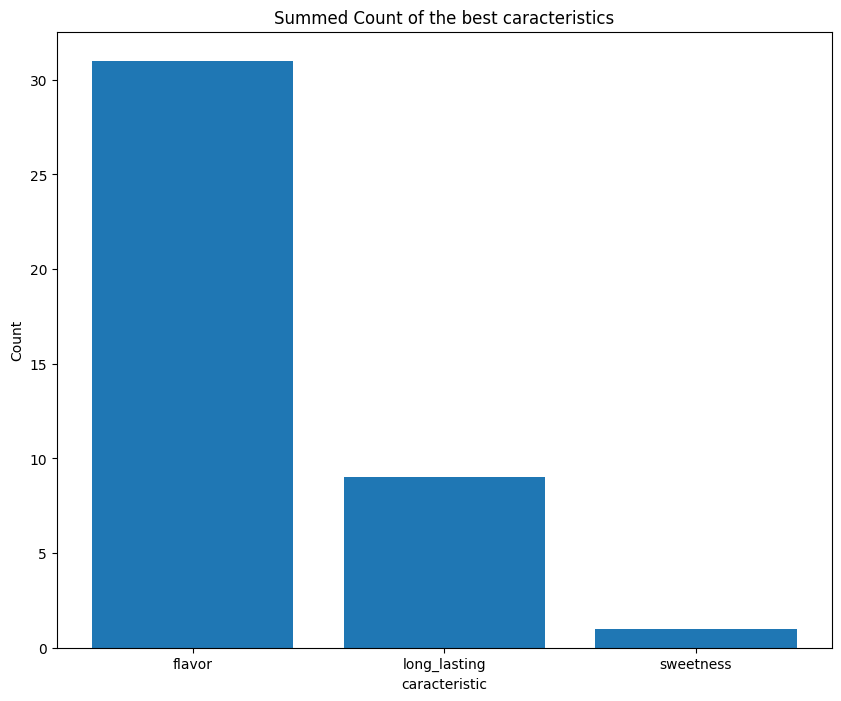

In [37]:
show_best_caracteristic(data[data['nb_review']>0]['best_caracteristic'])

As we see product with a better flavor than the to other caracteristic tends to have a better overall note.

In [38]:
avg_note_carac = note_by_best_caracteristic(data[data['nb_review']>0])
print(f"Average note with flavor as best caracteristic : {avg_note_carac['flavor']}.")
print(f"Average note with long_lasting as best caracteristic : {avg_note_carac['long_lasting']}.")
print(f"Average note with sweetness as best caracteristic : {avg_note_carac['sweetness']}.")

Average note with flavor as best caracteristic : 4.632258064516128.
Average note with long_lasting as best caracteristic : 4.433333333333334.
Average note with sweetness as best caracteristic : 4.2.


As we can see in the next plot, note and flavor seems correlated

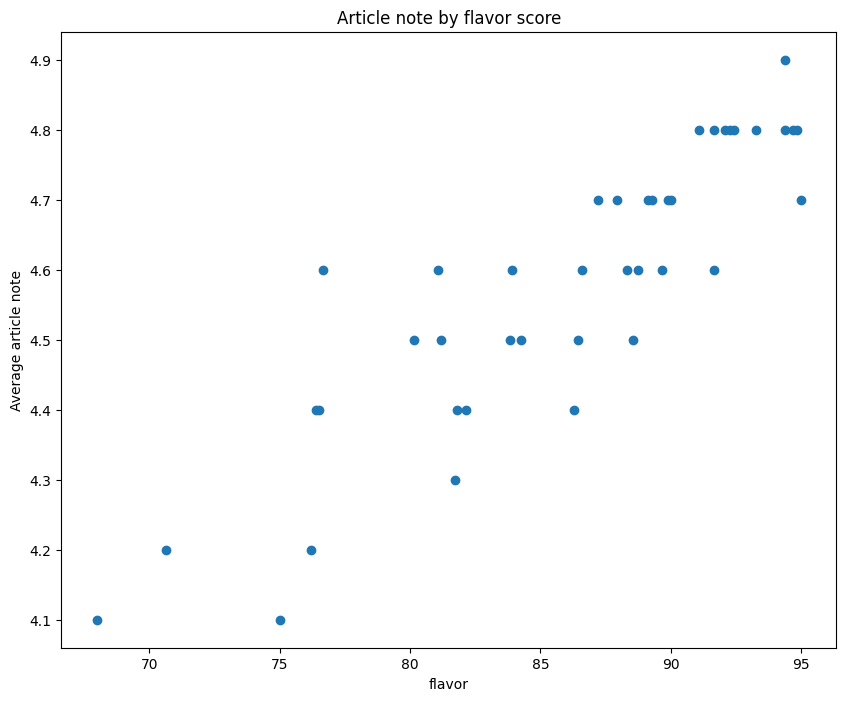

In [39]:
show_note_by_caracteristic(data[data['nb_review']>0],'flavor')

But are notes really related to what people thinks ?

In [40]:
data['sentiment'] = data[data['nb_review']>0]['reviews'].apply(polarity_review)

To have an idea od the scale :

In [41]:
print(f"With the word Love we get a score of : {TextBlob('Love').sentiment.polarity}")
print(f"With the word Hate we get a score of : {TextBlob('Hate').sentiment.polarity}")

With the word Love we get a score of : 0.5
With the word Hate we get a score of : -0.8


We can see globaly notes are hight where sentiments polarity are too. But we can see by the distribution people who gives reviews tends to be a little bit more generous in note than in comments.

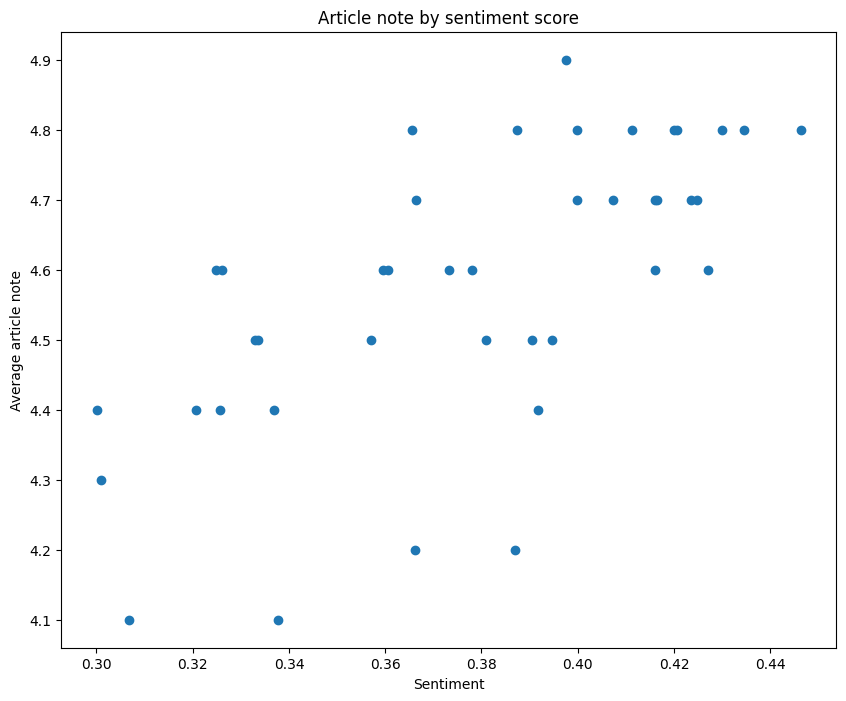

In [42]:
Note_by_sentiment = data[data['nb_review']>0][['average_score','sentiment']].sort_values(0,axis=1)

# Set the size of the figure
fig, ax = plt.subplots(figsize=(10, 8))

# Create a bar chart of the summed count of each word
ax.scatter(Note_by_sentiment['sentiment'],Note_by_sentiment['average_score'])
ax.set_xlabel('Sentiment')
ax.set_ylabel('Average article note')
ax.set_title(f'Article note by sentiment score')
plt.show()

This scrapping code and analysis can be upgrad with a more precise idea of what we want from this site and time (ingredients aren't maybe relevant information, scrape more deeply the reviews (scrape not only texts but everything),...). 